In [ ]:
import requests
from io import StringIO
import pandas as pd
from scipy.io import arff

In [ ]:
from scipy.io import arff
import pandas as pd
import requests
from io import StringIO

# URL of the dataset in ARFF format
url = 'http://promise.site.uottawa.ca/SERepository/datasets/cm1.arff'

# Download the dataset
response = requests.get(url)

# Load the dataset from the response content
data = arff.loadarff(StringIO(response.content.decode('utf-8')))
df = pd.DataFrame(data[0])

# Print the first few rows of the DataFrame
print(df.head())

    loc  v(g)  ev(g)  iv(g)     n       v     l      d      i        e  ...  \
0   1.1   1.4    1.4    1.4   1.3    1.30  1.30   1.30   1.30     1.30  ...   
1   1.0   1.0    1.0    1.0   1.0    1.00  1.00   1.00   1.00     1.00  ...   
2  24.0   5.0    1.0    3.0  63.0  309.13  0.11   9.50  32.54  2936.77  ...   
3  20.0   4.0    4.0    2.0  47.0  215.49  0.06  16.00  13.47  3447.89  ...   
4  24.0   6.0    6.0    2.0  72.0  346.13  0.06  17.33  19.97  5999.58  ...   

   lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0     2.0        2.0      2.0                2.0      1.2        1.2   
1     1.0        1.0      1.0                1.0      1.0        1.0   
2     1.0        0.0      6.0                0.0     15.0       15.0   
3     0.0        0.0      3.0                0.0     16.0        8.0   
4     0.0        0.0      3.0                0.0     16.0       12.0   

   total_Op  total_Opnd  branchCount   defects  
0       1.2         1.2          1.4  b'fal

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'defects' column
df['defects'] = label_encoder.fit_transform(df['defects'])

# Separate the 'defects' column from the rest of the data
defects_column = df['defects']

# Drop the 'defects' column from the DataFrame
df = df.drop(columns=['defects'])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler to your data and transform it
scaled_data = scaler.fit_transform(df)

# Concatenate the scaled features with the 'defects' column
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df['defects'] = defects_column

# Print the first few rows of the scaled DataFrame
print(scaled_df.head())


        loc      v(g)     ev(g)     iv(g)         n         v         l  \
0 -0.668330 -0.477556 -0.298416 -0.389989 -0.646007 -0.532158  7.247750   
1 -0.670671 -0.525524 -0.407850 -0.463264 -0.647366 -0.532335  5.363055   
2 -0.132163 -0.045848 -0.407850 -0.096890 -0.366604 -0.349914 -0.228207   
3 -0.225817 -0.165767  0.412905 -0.280077 -0.439059 -0.405352 -0.542323   
4 -0.132163  0.074070  0.960075 -0.280077 -0.325849 -0.328009 -0.542323   

          d         i         e  ...    lOCode  lOComment   lOBlank  \
0 -0.948668 -1.005309 -0.260268  ... -0.210250  -0.398530 -0.477629   
1 -0.968256 -1.013426 -0.260270  ... -0.327896  -0.437286 -0.527725   
2 -0.413265 -0.160051 -0.238366  ... -0.327896  -0.476041 -0.277242   
3  0.011140 -0.676027 -0.234552  ... -0.445541  -0.476041 -0.427532   
4  0.097980 -0.500157 -0.215514  ... -0.445541  -0.476041 -0.427532   

   locCodeAndComment   uniq_Op  uniq_Opnd  total_Op  total_Opnd  branchCount  \
0          19.935901 -1.457012  -0.715579 

In [ ]:
print(df.shape)  # Check the dimensions of the DataFrame
print(df.head())  # Display the first few rows of the DataFrame


(498, 21)
    loc  v(g)  ev(g)  iv(g)     n       v     l      d      i        e  ...  \
0   1.1   1.4    1.4    1.4   1.3    1.30  1.30   1.30   1.30     1.30  ...   
1   1.0   1.0    1.0    1.0   1.0    1.00  1.00   1.00   1.00     1.00  ...   
2  24.0   5.0    1.0    3.0  63.0  309.13  0.11   9.50  32.54  2936.77  ...   
3  20.0   4.0    4.0    2.0  47.0  215.49  0.06  16.00  13.47  3447.89  ...   
4  24.0   6.0    6.0    2.0  72.0  346.13  0.06  17.33  19.97  5999.58  ...   

        t  lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0    1.30     2.0        2.0      2.0                2.0      1.2        1.2   
1    1.00     1.0        1.0      1.0                1.0      1.0        1.0   
2  163.15     1.0        0.0      6.0                0.0     15.0       15.0   
3  191.55     0.0        0.0      3.0                0.0     16.0        8.0   
4  333.31     0.0        0.0      3.0                0.0     16.0       12.0   

   total_Op  total_Opnd  branchCou

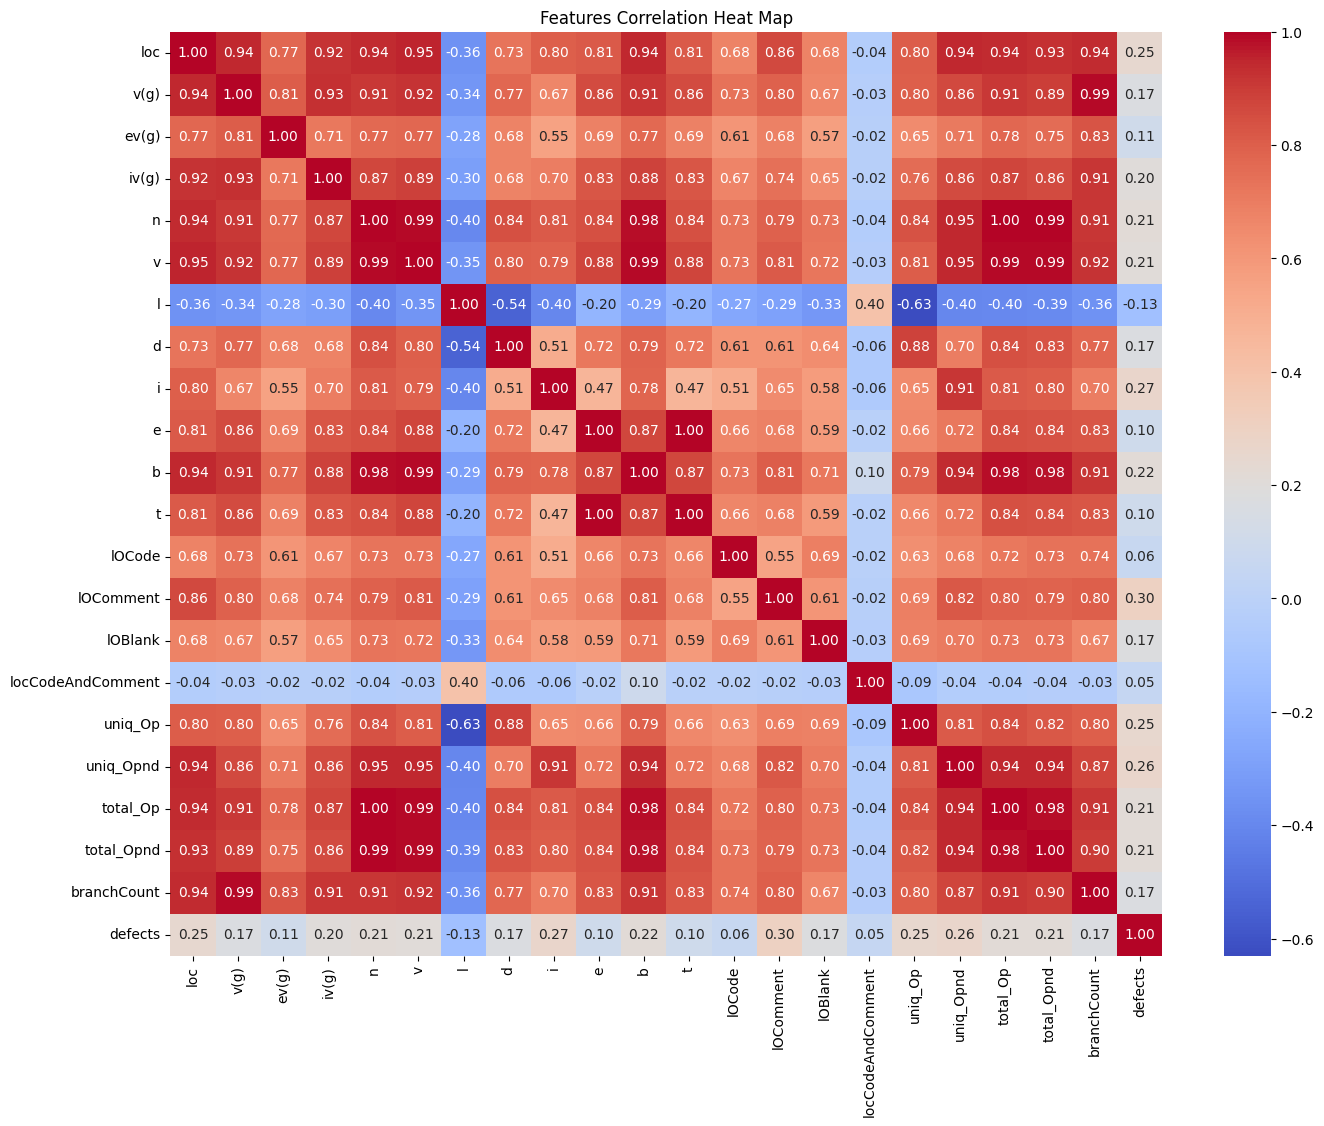

In [ ]:
# Plotting the features correlation heat map
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))
correlation_matrix = scaled_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Features Correlation Heat Map')
plt.show()

In [ ]:
# Remove rows with null values
df.dropna(inplace=True)


In [ ]:
# Check for NaN values in each column
nan_counts = df.isna().sum()

# Display columns with NaN values, if any
columns_with_nan = nan_counts[nan_counts > 0].index.tolist()
if columns_with_nan:
    print("Columns with NaN values:", columns_with_nan)
else:
    print("No NaN values remaining in the DataFrame")

No NaN values remaining in the DataFrame


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features (X) and target variable (y)
X = scaled_df.drop(columns=['defects'])
y = scaled_df['defects']

# Perform feature selection using SelectKBest with ANOVA F-value
k = 10  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)


In [ ]:
# Get indices of selected features
selected_indices = selector.get_support(indices=True)

# Get names of selected features
selected_features = X.columns[selected_indices]

# Print selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['loc', 'n', 'v', 'i', 'b', 'lOComment', 'uniq_Op', 'uniq_Opnd',
       'total_Op', 'total_Opnd'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

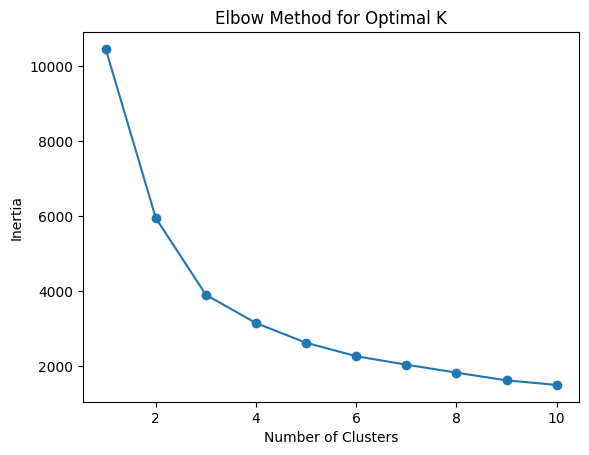

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        loc      v(g)     ev(g)     iv(g)         n         v         l  \
0 -0.668330 -0.477556 -0.298416 -0.389989 -0.646007 -0.532158  7.247750   
1 -0.670671 -0.525524 -0.407850 -0.463264 -0.647366 -0.532335  5.363055   
2 -0.132163 -0.045848 -0.407850 -0.096890 -0.366604 -0.349914 -0.228207   
3 -0.225817 -0.165767  0.412905 -0.280077 -0.439059 -0.405352 -0.542323   
4 -0.132163  0.074070  0.960075 -0.280077 -0.325849 -0.328009 -0.542323   

          d         i         e  ...  lOComment   lOBlank  locCodeAndComment  \
0 -0.948668 -1.005309 -0.260268  ...  -0.398530 -0.477629          19.935901   
1 -0.968256 -1.013426 -0.260270  ...  -0.437286 -0.527725           9.937836   
2 -0.413265 -0.160051 -0.238366  ...  -0.476041 -0.277242          -0.060229   
3  0.011140 -0.676027 -0.234552  ...  -0.476041 -0.427532          -0.060229   
4  0.097980 -0.500157 -0.215514  ...  -0.476041 -0.427532          -0.060229   

    uniq_Op  uniq_Opnd  total_Op  total_Opnd  branchCount  defects  

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop the 'defects' column for clustering
clustering_data = scaled_df.drop(columns=['defects'])

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# From the elbow curve, choose the optimal number of clusters
optimal_k = 2  # Example: Based on the plot, choose the optimal number of clusters

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(clustering_data)

# Add cluster labels to the DataFrame
scaled_df['cluster'] = clusters

# Print the first few rows of the DataFrame with cluster labels
print(scaled_df.head())


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X = scaled_df.drop(columns=['defects', 'cluster'])  # Features
y = scaled_df['defects']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize classifiers
svm_classifier = SVC(kernel='linear', random_state=42)
nb_classifier = GaussianNB()
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Initialize stacking classifier
estimators = [('svm', svm_classifier), ('nb', nb_classifier), ('rf', rf_classifier)]
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=nb_classifier)

# Train the classifiers
svm_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
stacking_classifier.fit(X_train, y_train)

# Predictions
svm_pred = svm_classifier.predict(X_test)
nb_pred = nb_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)
stacking_pred = stacking_classifier.predict(X_test)

# Evaluate accuracy
svm_accuracy = accuracy_score(y_test, svm_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
stacking_accuracy = accuracy_score(y_test, stacking_pred)

# Print accuracies
print("SVM Accuracy:", svm_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Stacking Classifier Accuracy:", stacking_accuracy)


SVM Accuracy: 0.8727272727272727
Naive Bayes Accuracy: 0.8484848484848485
Random Forest Accuracy: 0.8727272727272727
Stacking Classifier Accuracy: 0.8484848484848485


In [ ]:
from sklearn.metrics import classification_report

# Calculate metrics for SVM
svm_report = classification_report(y_test, svm_pred)
print("SVM Metrics:")
print(svm_report)

# Calculate metrics for Naive Bayes
nb_report = classification_report(y_test, nb_pred)
print("\nNaive Bayes Metrics:")
print(nb_report)

# Calculate metrics for Random Forest
rf_report = classification_report(y_test, rf_pred)
print("\nRandom Forest Metrics:")
print(rf_report)

# Calculate metrics for Stacking Classifier
stacking_report = classification_report(y_test, stacking_pred)
print("\nStacking Classifier Metrics:")
print(stacking_report)


SVM Metrics:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       147
           1       0.00      0.00      0.00        18

    accuracy                           0.87       165
   macro avg       0.44      0.49      0.47       165
weighted avg       0.79      0.87      0.83       165


Naive Bayes Metrics:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       147
           1       0.18      0.11      0.14        18

    accuracy                           0.85       165
   macro avg       0.54      0.52      0.53       165
weighted avg       0.82      0.85      0.83       165


Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       147
           1       0.20      0.06      0.09        18

    accuracy                           0.87       165
   macro avg       0.55      0.51      0.51       165
weighted avg   

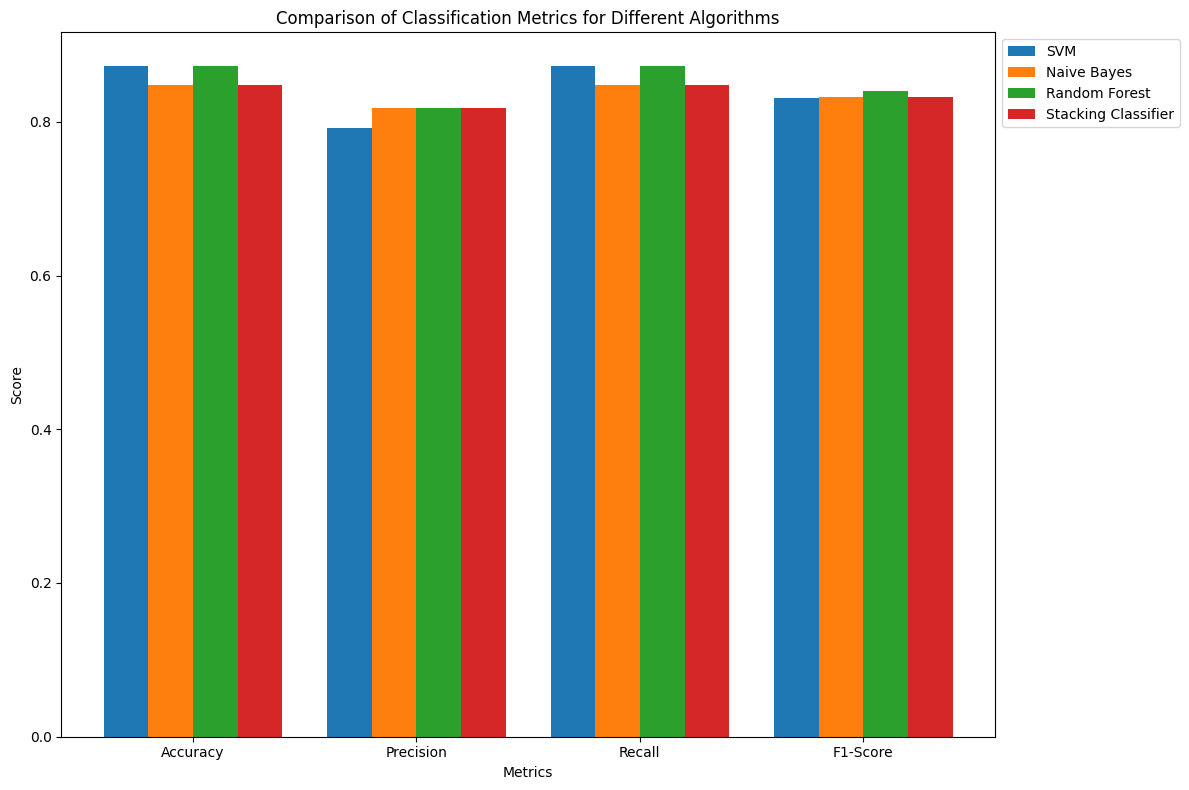

In [ ]:
import matplotlib.pyplot as plt

# Extracting metrics for SVM
svm_metrics = classification_report(y_test, svm_pred, output_dict=True)
svm_accuracy = svm_metrics['accuracy']
svm_precision = svm_metrics['weighted avg']['precision']
svm_recall = svm_metrics['weighted avg']['recall']
svm_f1_score = svm_metrics['weighted avg']['f1-score']

# Extracting metrics for Naive Bayes
nb_metrics = classification_report(y_test, nb_pred, output_dict=True)
nb_accuracy = nb_metrics['accuracy']
nb_precision = nb_metrics['weighted avg']['precision']
nb_recall = nb_metrics['weighted avg']['recall']
nb_f1_score = nb_metrics['weighted avg']['f1-score']

# Extracting metrics for Random Forest
rf_metrics = classification_report(y_test, rf_pred, output_dict=True)
rf_accuracy = rf_metrics['accuracy']
rf_precision = rf_metrics['weighted avg']['precision']
rf_recall = rf_metrics['weighted avg']['recall']
rf_f1_score = rf_metrics['weighted avg']['f1-score']

# Extracting metrics for Stacking Classifier
stacking_metrics = classification_report(y_test, stacking_pred, output_dict=True)
stacking_accuracy = stacking_metrics['accuracy']
stacking_precision = stacking_metrics['weighted avg']['precision']
stacking_recall = stacking_metrics['weighted avg']['recall']
stacking_f1_score = stacking_metrics['weighted avg']['f1-score']

# Plotting
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
svm_values = [svm_accuracy, svm_precision, svm_recall, svm_f1_score]
nb_values = [nb_accuracy, nb_precision, nb_recall, nb_f1_score]
rf_values = [rf_accuracy, rf_precision, rf_recall, rf_f1_score]
stacking_values = [stacking_accuracy, stacking_precision, stacking_recall, stacking_f1_score]

x = range(len(labels))

plt.figure(figsize=(12, 8))  # Increase the figure size

plt.bar(x, svm_values, width=0.2, label='SVM', align='center')
plt.bar([i + 0.2 for i in x], nb_values, width=0.2, label='Naive Bayes', align='center')
plt.bar([i + 0.4 for i in x], rf_values, width=0.2, label='Random Forest', align='center')
plt.bar([i + 0.6 for i in x], stacking_values, width=0.2, label='Stacking Classifier', align='center')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Classification Metrics for Different Algorithms')
plt.xticks([i + 0.3 for i in x], labels)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside the plot

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()



In [ ]:


from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Calculate mean absolute error (MAE)
svm_mae = mean_absolute_error(y_test, svm_pred)
nb_mae = mean_absolute_error(y_test, nb_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
stacking_mae = mean_absolute_error(y_test, stacking_pred)

# Calculate root mean squared error (RMSE)
svm_rmse = mean_squared_error(y_test, svm_pred, squared=False)
nb_rmse = mean_squared_error(y_test, nb_pred, squared=False)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
stacking_rmse = mean_squared_error(y_test, stacking_pred, squared=False)


# Print the calculated metrics
print("SVM MAE:", svm_mae)
print("Naive Bayes MAE:", nb_mae)
print("Random Forest MAE:", rf_mae)
print("Stacking Classifier MAE:", stacking_mae)

print("\nSVM RMSE:", svm_rmse)
print("Naive Bayes RMSE:", nb_rmse)
print("Random Forest RMSE:", rf_rmse)
print("Stacking Classifier RMSE:", stacking_rmse)



SVM MAE: 0.12727272727272726
Naive Bayes MAE: 0.15151515151515152
Random Forest MAE: 0.12727272727272726
Stacking Classifier MAE: 0.15151515151515152

SVM RMSE: 0.35675303400633784
Naive Bayes RMSE: 0.3892494720807615
Random Forest RMSE: 0.35675303400633784
Stacking Classifier RMSE: 0.3892494720807615

SVM MAPE: 81883629588554.58
Naive Bayes MAPE: 245650888765663.5
Random Forest MAPE: 109178172784739.39
Stacking Classifier MAPE: 245650888765663.5


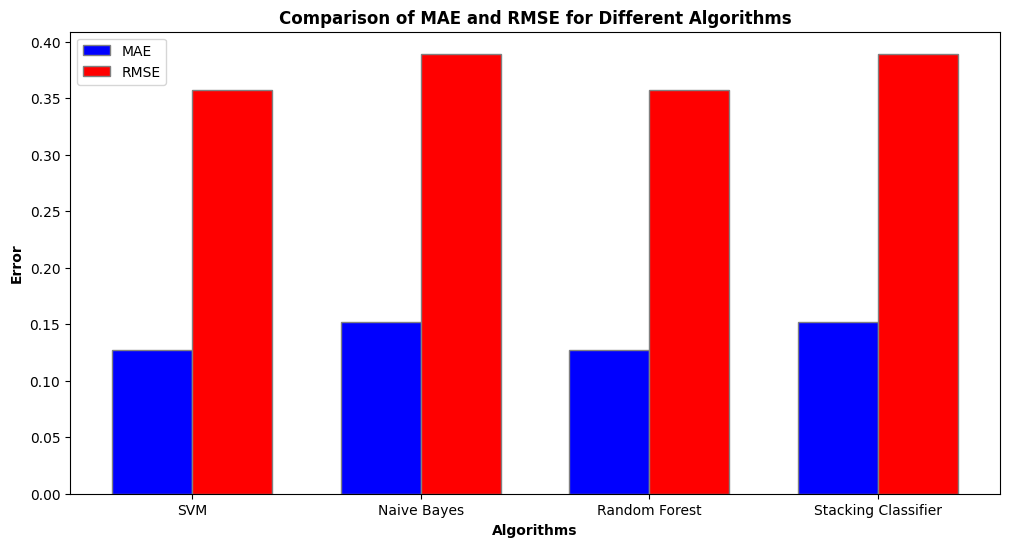

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the algorithms and their corresponding metrics
algorithms = ['SVM', 'Naive Bayes', 'Random Forest', 'Stacking Classifier']
mae_values = [svm_mae, nb_mae, rf_mae, stacking_mae]
rmse_values = [svm_rmse, nb_rmse, rf_rmse, stacking_rmse]

# Set the width of the bars
bar_width = 0.35

# Set positions of the bars on the x-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]

# Plotting
plt.figure(figsize=(12, 6))

# Create bars
plt.bar(r1, mae_values, color='b', width=bar_width, edgecolor='grey', label='MAE')
plt.bar(r2, rmse_values, color='r', width=bar_width, edgecolor='grey', label='RMSE')

# Add labels
plt.xlabel('Algorithms', fontweight='bold')
plt.ylabel('Error', fontweight='bold')
plt.title('Comparison of MAE and RMSE for Different Algorithms', fontweight='bold')

# Add xticks on the middle of the group bars
plt.xticks([r + bar_width/2 for r in range(len(algorithms))], algorithms)

# Create legend
plt.legend()

# Show plot
plt.show()



In [ ]:
pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# X = data.data
# y= data.target

# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:02<00:00, 12.25it/s]

[LightGBM] [Info] Number of positive: 31, number of negative: 302
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 333, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.093093 -> initscore=-2.276440
[LightGBM] [Info] Start training from score -2.276440
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

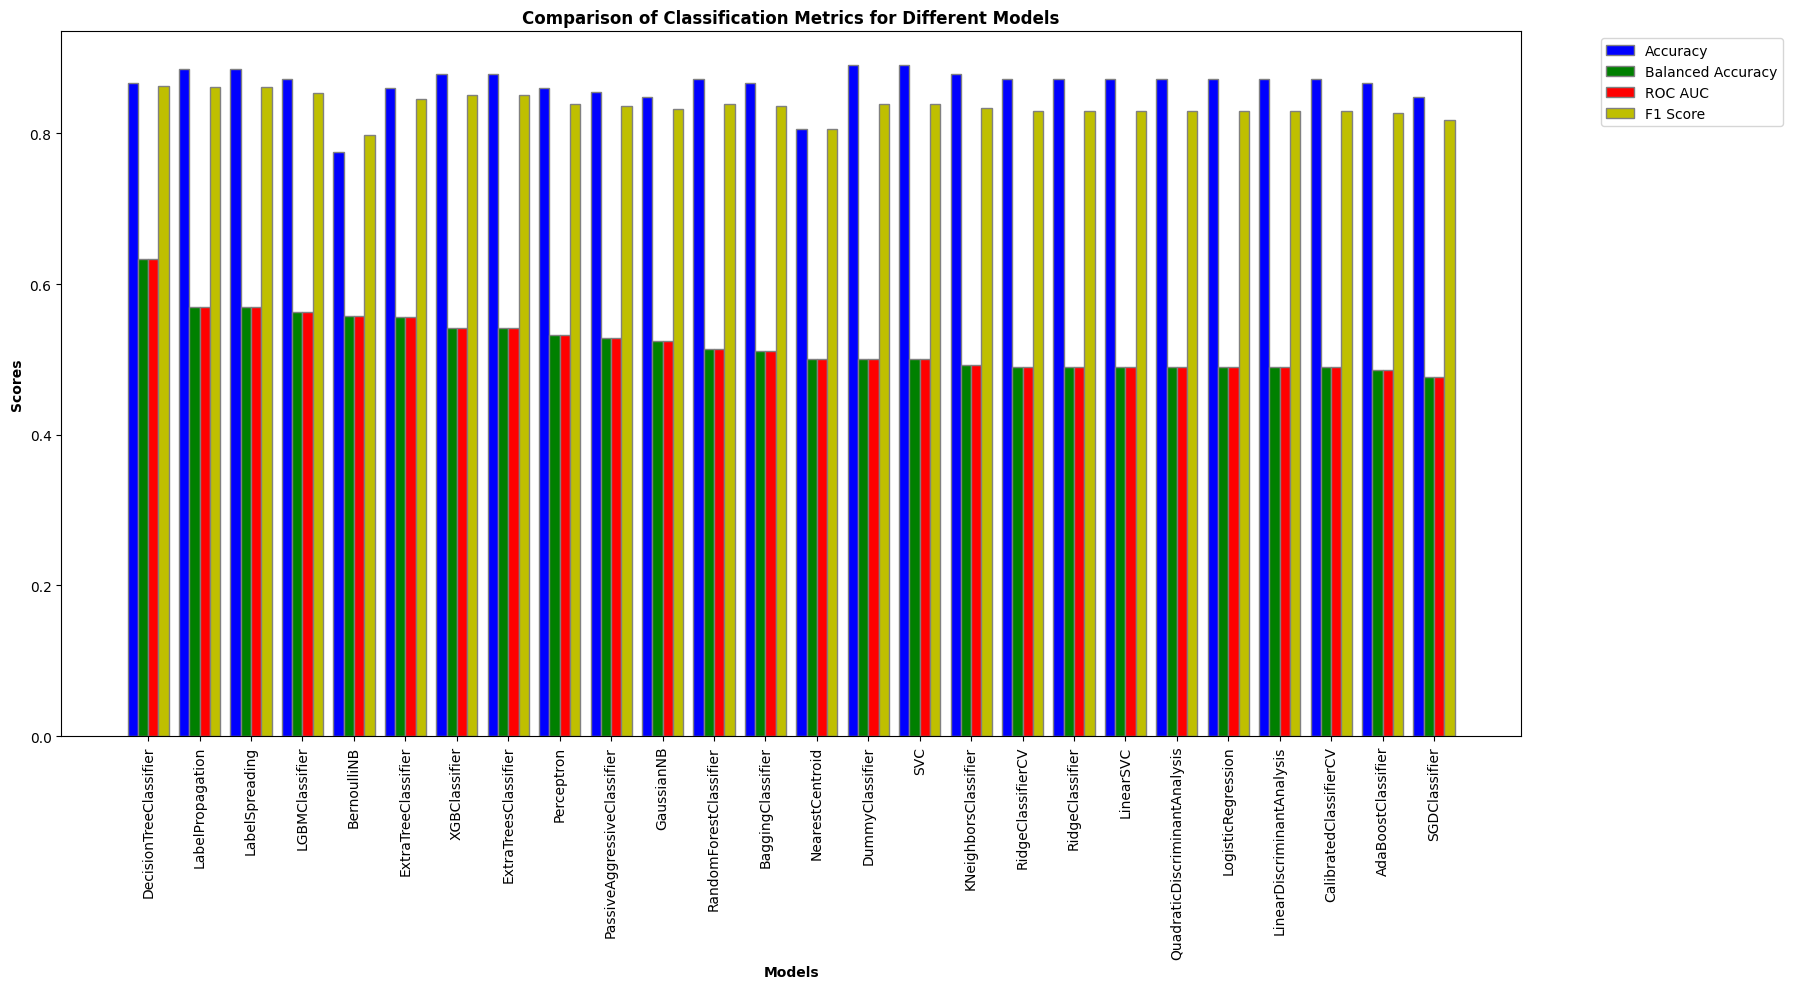

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics and extract their values from the models DataFrame
metrics = ['Accuracy', 'Balanced Accuracy', 'ROC AUC', 'F1 Score']
values = [models[metric].values for metric in metrics]
model_names = models.index

# Set the width of the bars
bar_width = 0.2

# Set positions of the bars on the x-axis
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting
plt.figure(figsize=(18, 10))

# Create bars for each metric
plt.bar(r1, values[0], color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, values[1], color='g', width=bar_width, edgecolor='grey', label='Balanced Accuracy')
plt.bar(r3, values[2], color='r', width=bar_width, edgecolor='grey', label='ROC AUC')
plt.bar(r4, values[3], color='y', width=bar_width, edgecolor='grey', label='F1 Score')

# Add labels
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Comparison of Classification Metrics for Different Models', fontweight='bold')

# Add xticks on the middle of the group bars
plt.xticks([r + 1.5 * bar_width for r in range(len(model_names))], model_names, rotation=90)

# Create legend and place it outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()
